## **Sarah Abraham - 9231**

# **ML Experiment 4**

Q1 Let’s assume we want to play badminton on a particular day — say Saturday — how will you decide whether to play or not. Let’s say you go out and check if it’s hot or cold, check the speed of the wind and humidity, how the weather is, i.e. is it sunny, cloudy, or rainy. You take all these factors into account to decide if you want to play or not

In [28]:
#Exercise 1
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

data = {
    "day": [1,2,3,4,5,6,7,8,9,10],
    "weather": ["sunny", "cloudy", "sunny", "cloudy", "rainy", "rainy", "rainy", "sunny", "cloudy", "rainy"],
    "temperature": ["hot", "hot", "mild", "mild", "mild", "cool", "mild", "hot", "hot", "mild"],
    "humidity": ["high", "high", "normal", "high", "high", "normal", "high", "high", "normal", "high"],
    "wind": ["weak", "weak", "strong", "strong", "strong", "strong", "weak", "strong", "weak", "strong"],
    "play_badminton": [0, 1, 1, 1, 0, 0, 1, 0, 1, 0]
}

In [22]:
df = pd.DataFrame(data)

X_train = df.drop("play_badminton", axis=1)
y_train = df["play_badminton"]

categ_feat = ["weather", "temperature", "humidity", "wind"]
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categ_feat)],
    remainder='passthrough'
)

In [23]:
X_train_encoded = preprocessor.fit_transform(X_train)

model = DecisionTreeClassifier()
model.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

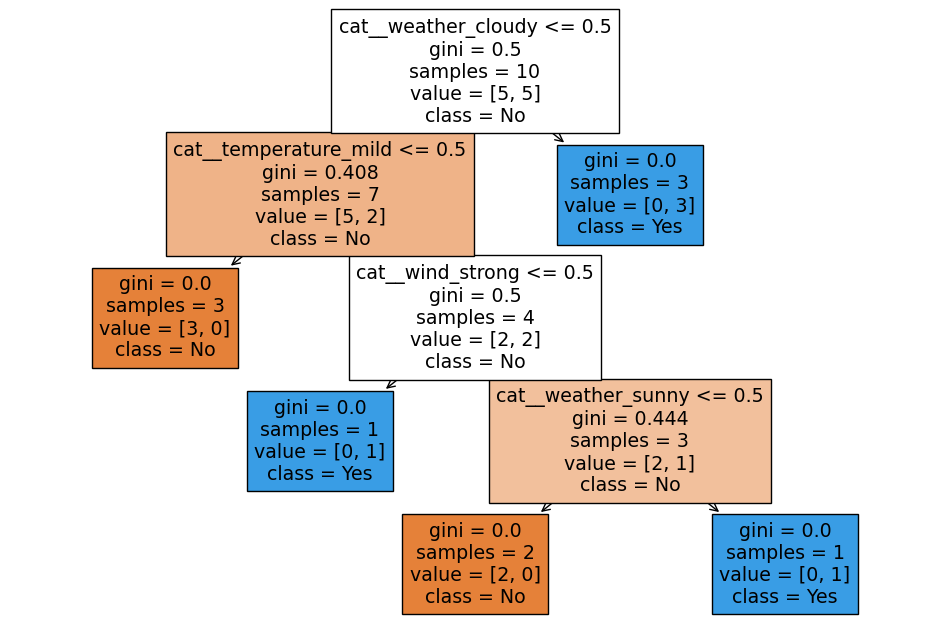

In [29]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=preprocessor.get_feature_names_out(input_features=X_train.columns), filled=True, class_names=["No", "Yes"])
plt.show()

In [56]:
day = 6
weather = "sunny"
temperature = "hot"
humidity = "high"
wind = "strong"

X_new = pd.DataFrame({
    "weather": [weather],
    "temperature": [temperature],
    "humidity": [humidity],
    "wind": [wind],
})

In [26]:
X_new_encoded = preprocessor.transform(X_new)

prediction = model.predict(X_new_encoded)

print("The answer for whether Saturday is a good day to play : ")

if(prediction==0):
    print("No")

else:
    print("Yes")


The answer for whether Saturday is a good day to play : 
No


Q2 Your company is considering whether it should tender for two contracts (MS1 and MS2) on offer from a government department for the supply of certain components

In [50]:
#Exercise 2
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from itertools import product

data = {
    "contracts": [1, 2, 3],
    "tender_cost": [50000, 14000, 55000],
    "component_supply_cost": [18000, 12000, 24000],
    "tender_prices": [[60000, 70000, 80000], [40000, 50000, 60000], [70000, 80000, 90000]],
    "probabilities": [[0.4, 0.3, 0.3], [0.5, 0.3, 0.2], [0.3, 0.4, 0.3]],
}

In [51]:
X = []
y = []

for i, contract in enumerate(data["contracts"]):
    for price_list, prob_list in zip(data["tender_prices"][i], data["probabilities"][i]):
        revenue = price_list - data["tender_cost"][i] + data["component_supply_cost"][i]
        expected_value = revenue * prob_list
        X.append([expected_value])
        y.append(contract)

In [52]:
combinations = list(product(data["contracts"], repeat=len(data["tender_prices"][0])))
for comb in combinations:
    comb_values = []
    for contract, price_list, prob_list in zip(comb, data["tender_prices"], data["probabilities"]):
        revenue = price_list[comb.index(contract)] - data["tender_cost"][data["contracts"].index(contract)] + data["component_supply_cost"][data["contracts"].index(contract)]
        expected_value = revenue * prob_list[comb.index(contract)]
        comb_values.append(expected_value)
    X.append([sum(comb_values)])
    y.append(max(set(comb), key=comb.count))  # Choose the most frequent contract in the combination

In [53]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)

# Predict the most profitable contract
most_profitable_contract = model.predict([[max(X)[0]]])

print(f"Most profitable contract: {most_profitable_contract[0]}")

Most profitable contract: 2


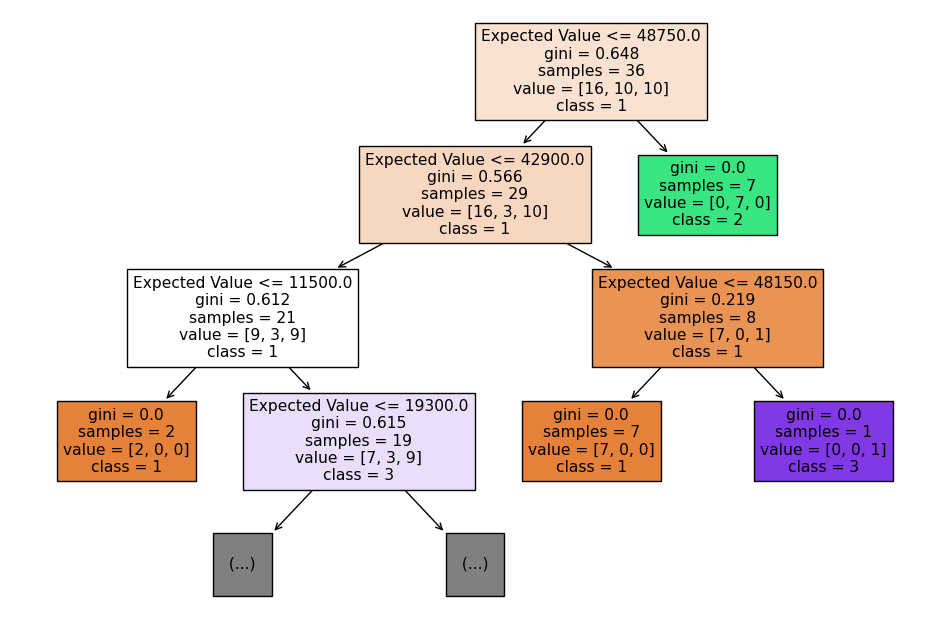

In [55]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=["Expected Value"], filled=True, class_names=[str(contract) for contract in data["contracts"]], max_depth=3)  # Set max_depth here too
plt.show()